[[ 1.00407727  1.01030091  1.00053488]
 [ 1.01242584  1.03138645  1.00164074]
 [ 1.02103286  1.05310558  1.00281251]
 ...
 [11.93909661 14.84823208 10.9694673 ]
 [11.97001212 14.92525405 10.98498421]
 [12.         15.         11.        ]]


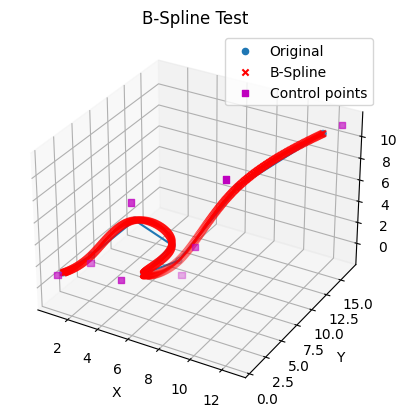

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data point
p = np.array(
    [
        [1, 1, 1],
        [2, 3, 2],
        [4, 5, 5],
        [6, 6, 3],
        [5, 4, 1],
        [6, 7, 1],
        [9, 9, 8],
        [12, 15, 11],
    ]
)

# Number of sample points
Np = len(p)

# Number of control points
Nq = Np

# Basis matrix
M = np.array([[-1, 3, -3, 1], [3, -6, 3, 0], [-3, 0, 3, 0], [1, 4, 1, 0]])

# Calculate the best control point locations
N = np.zeros((Np, Nq))

for i in range(Np):
    index_f = Nq * (i / Np)
    index_i = int(np.floor(index_f))
    t = index_f - index_i

    indexV = np.arange(index_i - 1, index_i + 3)
    indexV[indexV < 0] = 0
    indexV[indexV >= Nq] = Nq - 1

    tv = np.array([t**3, t**2, t, 1])
    temp = tv @ M / 6
    N[i, indexV[0]] += temp[0]
    N[i, indexV[1]] += temp[1]
    N[i, indexV[2]] += temp[2]
    N[i, indexV[3]] += temp[3]

invNN_Nt = np.linalg.inv(N.T @ N) @ N.T

# Control points
Q = invNN_Nt @ p

# Draw line
Nbs = 500
BSpline = np.zeros((0, 3))  # empty

for i in range(1, Nbs + 1):
    index_f = Nq * (i / Nbs)
    if index_f < 1:
        continue
    index_int = int(np.floor(index_f))
    t = index_f - index_int
    tv = np.array([t**3, t**2, t, 1])

    indexV = np.arange(index_int - 2, index_int + 2)
    indexV[indexV < 0] = 0
    indexV[indexV >= Nq] = Nq - 1

    Q_4 = Q[indexV, :]
    pbs = tv @ M @ Q_4 / 6
    BSpline = np.vstack((BSpline, pbs))

print(BSpline)

# Spline display
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(p[:, 0], p[:, 1], p[:, 2], marker="o", label="Original")
ax.plot(p[:, 0], p[:, 1], p[:, 2])
ax.scatter(
    BSpline[:, 0],
    BSpline[:, 1],
    BSpline[:, 2],
    marker="x",
    color="r",
    label="B-Spline",
)
ax.scatter(Q[:, 0], Q[:, 1], Q[:, 2], marker="s", color="m", label="Control points")
ax.legend()
ax.set_title("B-Spline Test")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.grid()
plt.show()